# Banknote aunthentication

In [18]:
# importing python data analysis toolkit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 

In [19]:
# reading random points from xlsx file and storing results in data frame
data = pd.read_csv("data_banknote_authentication.csv")
data.head(5)

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Analyzing the data

In [20]:
data.info() # missing values not found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   kurtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [28]:
#number of instances (rows) that belong to each class. We can view this as an absolute count.
data['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

Visualizing the Class Column

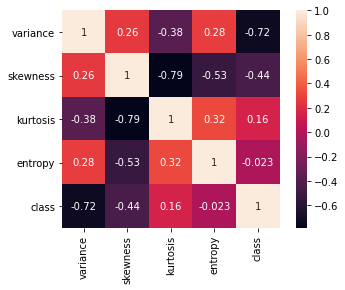

In [46]:
sns.heatmap(data.corr(), square=True, annot=True)


In [54]:
columns = [f for f in data.columns if data.dtypes[f] != 'object']
values = pd.melt(data, value_vars = columns)
hist = sns.FacetGrid (values, col='variable', col_wrap=4, sharex=False, sharey = False)
hist = hist.map(sns.distplot, 'value')

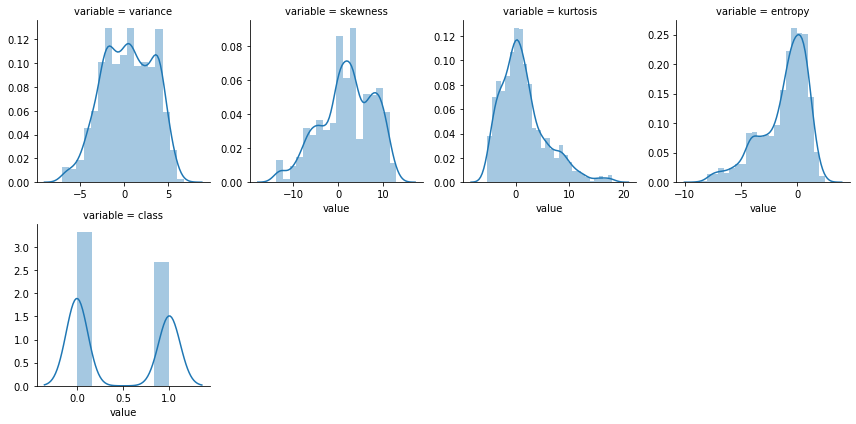

In [55]:
hist

Splitting data into training and testing

In [5]:
X5 = data.drop('class', axis=1)
X5.head()

,variance,skewness,kurtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [89]:
y5  = data['class']
y5.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split  
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size = 0.20) 
print("Sample in traiing set:::", X5_train.shape)
print("Sample in testing set:::", X5_test.shape)
print("Sample of target in training set::", y5_train.shape)
print("Sample of target in testing set::", y5_test.shape)


Sample in traiing set::: (1097, 4)
Sample in testing set::: (275, 4)
Sample of target in training set:: (1097,)
Sample of target in testing set:: (275,)


In [122]:
from sklearn.neural_network._stochastic_optimizers import SGDOptimizer

In [177]:
gd = SGDOptimizer(params='0.1', learning_rate_init=0.1)

In [184]:
gd.fit(X5_train, y5_train)

In [193]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y5_test,pred5.round()))  
print(classification_report(y5_test,pred5.round()))

[[158   2]
 [  1 114]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       160
           1       0.98      0.99      0.99       115

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [194]:
from sklearn.metrics import accuracy_score
accuracy5 = accuracy_score(y5_test, pred5.round())
print("Accuracy", accuracy5)


Accuracy 0.9890909090909091
